# Redes Perceptron de Múltiplas Camadas

* Rede feed-forward
* Treinamento Supervisionado
* Algoritmo Backpropagation

## Modelo de rede

<img src="rede.jpg" style=width:500px;height:400px/>

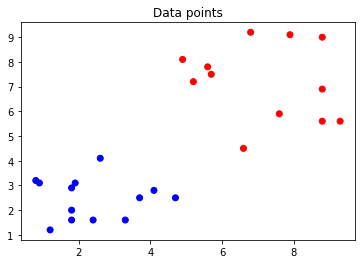

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([[5.7, 7.5], [9.3, 5.6], [8.8, 6.9], [6.8, 9.2], [7.9, 9.1],
              [8.8, 5.6], [5.6, 7.8], [8.8, 9.0], [7.6, 5.9], [4.9, 8.1],
              [6.6, 4.5], [5.2, 7.2], [1.2, 1.2], [2.4, 1.6], [4.7, 2.5],
              [0.9, 3.1], [2.6, 4.1], [1.8, 2.0], [4.1, 2.8], [1.8, 1.6],
              [1.9, 3.1], [0.8, 3.2], [1.8, 2.9], [3.3, 1.6], [3.7, 2.5]
             ])

d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],
              [0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

shuffle = np.random.permutation(len(x))
x = x[shuffle]
d = d[shuffle]

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [2]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        """ Construtor """
        # Taxa de aprendizado 
        self.lr = lr
        
        # tolerância
        self.e = e
        
        # Quantidade de neurônios por camadas
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        '''Calcula a sigmoid de um valor'''
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        '''Calcula a derivada da função sigmoid'''
        sig = self.sigmoid(valor)
        return sig*(1 - sig)

    def activate(self, valor):
        '''Ativa as saídas do neurônio'''
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        '''Calcular a derivada da função de ativação'''
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        '''Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)

    def predict(self, input_data, weights):
        '''Calcula a soma ponderada das entradas pelo peso'''
        return np.dot(input_data, weights).reshape(1, -1)
    
    def train(self, x, d):
        ''' 
        Definir aleatoriamente os pesos, o bias e o peso do bias
        Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.w1 = np.random.random((x.shape[1]+1,self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        
        epoch = 0
        last_mse = np.inf
        self.total_mse = []
        self.bias = -1
        
        while True:
            mse = 0
            for xi, target in zip(x,d):
                input_value = np.insert(xi, 0, self.bias)
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                current_error = self.evaluate(target, y3)
                mse+=(current_error ** 2)

                delta3 = (target - y3) * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)

                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)

                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)

            mse = mse / len(x)
            
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1
        
        
        
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(int(np.rint(y3)))
            
        return results
            
    

In [3]:
# Instanciando a rede e treinando-a
rede = MLP(lr = 0.1, e = 1e-6, neurons = [4, 3, 1])
rede.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.37512864]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.34987954]] - |mse_ant - mse|: [[0.0252491]]
EPOCH: 2 - MSE: [[0.3244402]] - |mse_ant - mse|: [[0.02543934]]
EPOCH: 3 - MSE: [[0.30165839]] - |mse_ant - mse|: [[0.0227818]]
EPOCH: 4 - MSE: [[0.2836195]] - |mse_ant - mse|: [[0.01803889]]
EPOCH: 5 - MSE: [[0.270821]] - |mse_ant - mse|: [[0.0127985]]
EPOCH: 6 - MSE: [[0.26248573]] - |mse_ant - mse|: [[0.00833527]]
EPOCH: 7 - MSE: [[0.25737545]] - |mse_ant - mse|: [[0.00511028]]
EPOCH: 8 - MSE: [[0.25436461]] - |mse_ant - mse|: [[0.00301084]]
EPOCH: 9 - MSE: [[0.25263397]] - |mse_ant - mse|: [[0.00173064]]
EPOCH: 10 - MSE: [[0.25165208]] - |mse_ant - mse|: [[0.00098189]]
EPOCH: 11 - MSE: [[0.25109559]] - |mse_ant - mse|: [[0.00055649]]
EPOCH: 12 - MSE: [[0.25077504]] - |mse_ant - mse|: [[0.00032055]]
EPOCH: 13 - MSE: [[0.25058203]] - |mse_ant - mse|: [[0.00019301]]
EPOCH: 14 - MSE: [[0.25045561]] - |mse_ant - mse|: [[0.00012642]]
EPOCH: 15 - MSE: [[0.25036208]] - 

EPOCH: 146 - MSE: [[0.15157144]] - |mse_ant - mse|: [[0.00248823]]
EPOCH: 147 - MSE: [[0.1490621]] - |mse_ant - mse|: [[0.00250934]]
EPOCH: 148 - MSE: [[0.14653451]] - |mse_ant - mse|: [[0.00252759]]
EPOCH: 149 - MSE: [[0.14399162]] - |mse_ant - mse|: [[0.00254288]]
EPOCH: 150 - MSE: [[0.1414365]] - |mse_ant - mse|: [[0.00255513]]
EPOCH: 151 - MSE: [[0.13887224]] - |mse_ant - mse|: [[0.00256426]]
EPOCH: 152 - MSE: [[0.13630201]] - |mse_ant - mse|: [[0.00257022]]
EPOCH: 153 - MSE: [[0.13372902]] - |mse_ant - mse|: [[0.00257299]]
EPOCH: 154 - MSE: [[0.13115647]] - |mse_ant - mse|: [[0.00257255]]
EPOCH: 155 - MSE: [[0.12858756]] - |mse_ant - mse|: [[0.00256891]]
EPOCH: 156 - MSE: [[0.12602547]] - |mse_ant - mse|: [[0.0025621]]
EPOCH: 157 - MSE: [[0.1234733]] - |mse_ant - mse|: [[0.00255217]]
EPOCH: 158 - MSE: [[0.12093412]] - |mse_ant - mse|: [[0.00253918]]
EPOCH: 159 - MSE: [[0.11841089]] - |mse_ant - mse|: [[0.00252323]]
EPOCH: 160 - MSE: [[0.11590648]] - |mse_ant - mse|: [[0.00250441]]

EPOCH: 279 - MSE: [[0.01342831]] - |mse_ant - mse|: [[0.00015307]]
EPOCH: 280 - MSE: [[0.01327801]] - |mse_ant - mse|: [[0.0001503]]
EPOCH: 281 - MSE: [[0.01313041]] - |mse_ant - mse|: [[0.0001476]]
EPOCH: 282 - MSE: [[0.01298545]] - |mse_ant - mse|: [[0.00014496]]
EPOCH: 283 - MSE: [[0.01284308]] - |mse_ant - mse|: [[0.00014238]]
EPOCH: 284 - MSE: [[0.01270322]] - |mse_ant - mse|: [[0.00013986]]
EPOCH: 285 - MSE: [[0.01256582]] - |mse_ant - mse|: [[0.0001374]]
EPOCH: 286 - MSE: [[0.01243082]] - |mse_ant - mse|: [[0.000135]]
EPOCH: 287 - MSE: [[0.01229817]] - |mse_ant - mse|: [[0.00013265]]
EPOCH: 288 - MSE: [[0.01216781]] - |mse_ant - mse|: [[0.00013036]]
EPOCH: 289 - MSE: [[0.0120397]] - |mse_ant - mse|: [[0.00012812]]
EPOCH: 290 - MSE: [[0.01191377]] - |mse_ant - mse|: [[0.00012593]]
EPOCH: 291 - MSE: [[0.01178999]] - |mse_ant - mse|: [[0.00012379]]
EPOCH: 292 - MSE: [[0.01166829]] - |mse_ant - mse|: [[0.00012169]]
EPOCH: 293 - MSE: [[0.01154864]] - |mse_ant - mse|: [[0.00011965]]
E

EPOCH: 429 - MSE: [[0.00433529]] - |mse_ant - mse|: [[2.24773773e-05]]
EPOCH: 430 - MSE: [[0.00431302]] - |mse_ant - mse|: [[2.22750255e-05]]
EPOCH: 431 - MSE: [[0.00429094]] - |mse_ant - mse|: [[2.20752227e-05]]
EPOCH: 432 - MSE: [[0.00426906]] - |mse_ant - mse|: [[2.18779282e-05]]
EPOCH: 433 - MSE: [[0.00424738]] - |mse_ant - mse|: [[2.16831019e-05]]
EPOCH: 434 - MSE: [[0.00422589]] - |mse_ant - mse|: [[2.14907047e-05]]
EPOCH: 435 - MSE: [[0.00420459]] - |mse_ant - mse|: [[2.13006981e-05]]
EPOCH: 436 - MSE: [[0.00418348]] - |mse_ant - mse|: [[2.11130443e-05]]
EPOCH: 437 - MSE: [[0.00416255]] - |mse_ant - mse|: [[2.09277063e-05]]
EPOCH: 438 - MSE: [[0.0041418]] - |mse_ant - mse|: [[2.07446478e-05]]
EPOCH: 439 - MSE: [[0.00412124]] - |mse_ant - mse|: [[2.05638332e-05]]
EPOCH: 440 - MSE: [[0.00410085]] - |mse_ant - mse|: [[2.03852274e-05]]
EPOCH: 441 - MSE: [[0.00408065]] - |mse_ant - mse|: [[2.02087962e-05]]
EPOCH: 442 - MSE: [[0.00406061]] - |mse_ant - mse|: [[2.0034506e-05]]
EPOCH: 4

EPOCH: 578 - MSE: [[0.00236834]] - |mse_ant - mse|: [[7.6878627e-06]]
EPOCH: 579 - MSE: [[0.00236069]] - |mse_ant - mse|: [[7.64349011e-06]]
EPOCH: 580 - MSE: [[0.00235309]] - |mse_ant - mse|: [[7.59948198e-06]]
EPOCH: 581 - MSE: [[0.00234554]] - |mse_ant - mse|: [[7.55583444e-06]]
EPOCH: 582 - MSE: [[0.00233803]] - |mse_ant - mse|: [[7.5125437e-06]]
EPOCH: 583 - MSE: [[0.00233056]] - |mse_ant - mse|: [[7.46960599e-06]]
EPOCH: 584 - MSE: [[0.00232313]] - |mse_ant - mse|: [[7.4270176e-06]]
EPOCH: 585 - MSE: [[0.00231574]] - |mse_ant - mse|: [[7.38477487e-06]]
EPOCH: 586 - MSE: [[0.0023084]] - |mse_ant - mse|: [[7.34287418e-06]]
EPOCH: 587 - MSE: [[0.0023011]] - |mse_ant - mse|: [[7.30131197e-06]]
EPOCH: 588 - MSE: [[0.00229384]] - |mse_ant - mse|: [[7.26008472e-06]]
EPOCH: 589 - MSE: [[0.00228662]] - |mse_ant - mse|: [[7.21918893e-06]]
EPOCH: 590 - MSE: [[0.00227944]] - |mse_ant - mse|: [[7.17862117e-06]]
EPOCH: 591 - MSE: [[0.0022723]] - |mse_ant - mse|: [[7.13837806e-06]]
EPOCH: 592 -

EPOCH: 725 - MSE: [[0.00158183]] - |mse_ant - mse|: [[3.71998186e-06]]
EPOCH: 726 - MSE: [[0.00157812]] - |mse_ant - mse|: [[3.7042661e-06]]
EPOCH: 727 - MSE: [[0.00157444]] - |mse_ant - mse|: [[3.68864549e-06]]
EPOCH: 728 - MSE: [[0.00157076]] - |mse_ant - mse|: [[3.67311928e-06]]
EPOCH: 729 - MSE: [[0.0015671]] - |mse_ant - mse|: [[3.65768673e-06]]
EPOCH: 730 - MSE: [[0.00156346]] - |mse_ant - mse|: [[3.6423471e-06]]
EPOCH: 731 - MSE: [[0.00155984]] - |mse_ant - mse|: [[3.62709967e-06]]
EPOCH: 732 - MSE: [[0.00155622]] - |mse_ant - mse|: [[3.61194372e-06]]
EPOCH: 733 - MSE: [[0.00155263]] - |mse_ant - mse|: [[3.59687855e-06]]
EPOCH: 734 - MSE: [[0.00154904]] - |mse_ant - mse|: [[3.58190344e-06]]
EPOCH: 735 - MSE: [[0.00154548]] - |mse_ant - mse|: [[3.56701769e-06]]
EPOCH: 736 - MSE: [[0.00154193]] - |mse_ant - mse|: [[3.55222063e-06]]
EPOCH: 737 - MSE: [[0.00153839]] - |mse_ant - mse|: [[3.53751155e-06]]
EPOCH: 738 - MSE: [[0.00153486]] - |mse_ant - mse|: [[3.52288979e-06]]
EPOCH: 73

EPOCH: 876 - MSE: [[0.00115828]] - |mse_ant - mse|: [[2.11606594e-06]]
EPOCH: 877 - MSE: [[0.00115617]] - |mse_ant - mse|: [[2.10907972e-06]]
EPOCH: 878 - MSE: [[0.00115407]] - |mse_ant - mse|: [[2.10212667e-06]]
EPOCH: 879 - MSE: [[0.00115197]] - |mse_ant - mse|: [[2.0952066e-06]]
EPOCH: 880 - MSE: [[0.00114989]] - |mse_ant - mse|: [[2.0883193e-06]]
EPOCH: 881 - MSE: [[0.0011478]] - |mse_ant - mse|: [[2.08146457e-06]]
EPOCH: 882 - MSE: [[0.00114573]] - |mse_ant - mse|: [[2.07464221e-06]]
EPOCH: 883 - MSE: [[0.00114366]] - |mse_ant - mse|: [[2.06785201e-06]]
EPOCH: 884 - MSE: [[0.0011416]] - |mse_ant - mse|: [[2.06109379e-06]]
EPOCH: 885 - MSE: [[0.00113955]] - |mse_ant - mse|: [[2.05436735e-06]]
EPOCH: 886 - MSE: [[0.0011375]] - |mse_ant - mse|: [[2.04767248e-06]]
EPOCH: 887 - MSE: [[0.00113546]] - |mse_ant - mse|: [[2.04100901e-06]]
EPOCH: 888 - MSE: [[0.00113342]] - |mse_ant - mse|: [[2.03437673e-06]]
EPOCH: 889 - MSE: [[0.0011314]] - |mse_ant - mse|: [[2.02777546e-06]]
EPOCH: 890 -

EPOCH: 1031 - MSE: [[0.00089811]] - |mse_ant - mse|: [[1.33267959e-06]]
EPOCH: 1032 - MSE: [[0.00089678]] - |mse_ant - mse|: [[1.32909156e-06]]
EPOCH: 1033 - MSE: [[0.00089546]] - |mse_ant - mse|: [[1.32551745e-06]]
EPOCH: 1034 - MSE: [[0.00089414]] - |mse_ant - mse|: [[1.3219572e-06]]
EPOCH: 1035 - MSE: [[0.00089282]] - |mse_ant - mse|: [[1.31841073e-06]]
EPOCH: 1036 - MSE: [[0.0008915]] - |mse_ant - mse|: [[1.31487799e-06]]
EPOCH: 1037 - MSE: [[0.00089019]] - |mse_ant - mse|: [[1.31135889e-06]]
EPOCH: 1038 - MSE: [[0.00088888]] - |mse_ant - mse|: [[1.30785337e-06]]
EPOCH: 1039 - MSE: [[0.00088758]] - |mse_ant - mse|: [[1.30436137e-06]]
EPOCH: 1040 - MSE: [[0.00088628]] - |mse_ant - mse|: [[1.30088281e-06]]
EPOCH: 1041 - MSE: [[0.00088498]] - |mse_ant - mse|: [[1.29741762e-06]]
EPOCH: 1042 - MSE: [[0.00088369]] - |mse_ant - mse|: [[1.29396574e-06]]
EPOCH: 1043 - MSE: [[0.0008824]] - |mse_ant - mse|: [[1.29052711e-06]]
EPOCH: 1044 - MSE: [[0.00088111]] - |mse_ant - mse|: [[1.28710166e-

In [4]:
# Testando os novos valores de pontos
x_teste = np.array([[6, 2], [9, 3], [5, 6], [7, 3], [6, 7], [1, 6]])


teste_resultado = rede.test(x_teste)
teste_resultado

[0, 1, 1, 1, 1, 0]

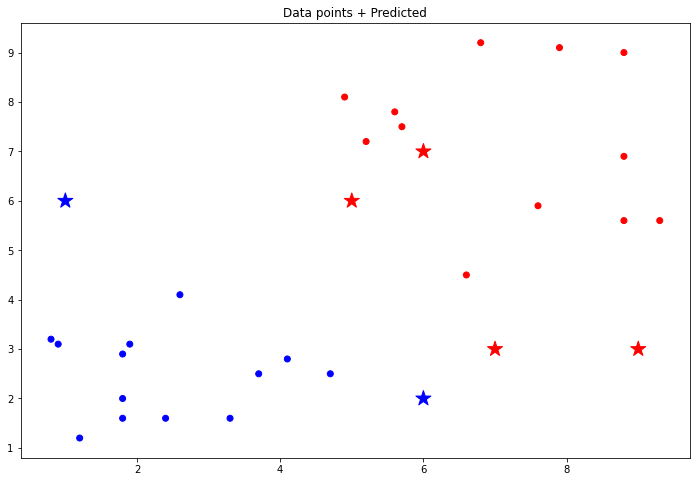

In [5]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()